In [2]:
!pip install selenium
!apt-get update
!apt install chromium-chromedriver
!pip install --upgrade openpyxl

print('installation complete')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 995 kB 5.2 MB/s 
     |████████████████████████████████| 384 kB 53.3 MB/s 
     |████████████████████████████████| 140 kB 60.8 MB/s 
     |████████████████████████████████| 58 kB 4.5 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
requests 2.23.0 requires urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1, but you have urllib3 1.26.12 which is incompatible.
Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:2 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:3 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu

In [4]:
import warnings
import time
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait 
from selenium.webdriver.support import expected_conditions as EC
from selenium import webdriver
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
from selenium.webdriver.chrome.options import Options
import pandas as pd
from datetime import date
from datetime import datetime
from google.colab import files
import requests as r

csv_url = 'https://ccaf.io/cbeci/api/v1.2.0/download/data?price=0.05'
req = r.get(csv_url)
url_content = req.content
csv_file = open('downloaded01.csv', 'wb')
csv_file.write(url_content)
csv_file.close()

In [5]:
dj = pd.read_csv('/content/downloaded01.csv', header=1)
dj.head()

,Timestamp,Date and Time,"power MAX, GW","power MIN, GW","power GUESS, GW","annualised consumption MAX, TWh","annualised consumption MIN, TWh","annualised consumption GUESS, TWh"
0,1279411200,2010-07-18T00:00:00,0.000027,0.000022,0.000024,0.000234,0.000197,0.000214
1,1279497600,2010-07-19T00:00:00,0.000027,0.000023,0.000025,0.000235,0.000198,0.000215
2,1279584000,2010-07-20T00:00:00,0.000027,0.000023,0.000025,0.000239,0.000201,0.000219
3,1279670400,2010-07-21T00:00:00,0.000028,0.000024,0.000026,0.000249,0.000210,0.000229
4,1279756800,2010-07-22T00:00:00,0.000028,0.000024,0.000026,0.000247,0.000208,0.000227


In [6]:
dj = dj.rename(columns = {'Date and Time':'Volume Date'})
n_cols = []
for i in dj.columns:
  n = i.lower().replace(",","").replace(" ",".")
  n_cols.append(n)

dj.columns = n_cols
dj.head()

,timestamp,volume.date,power.max.gw,power.min.gw,power.guess.gw,annualised.consumption.max.twh,annualised.consumption.min.twh,annualised.consumption.guess.twh
0,1279411200,2010-07-18T00:00:00,0.000027,0.000022,0.000024,0.000234,0.000197,0.000214
1,1279497600,2010-07-19T00:00:00,0.000027,0.000023,0.000025,0.000235,0.000198,0.000215
2,1279584000,2010-07-20T00:00:00,0.000027,0.000023,0.000025,0.000239,0.000201,0.000219
3,1279670400,2010-07-21T00:00:00,0.000028,0.000024,0.000026,0.000249,0.000210,0.000229
4,1279756800,2010-07-22T00:00:00,0.000028,0.000024,0.000026,0.000247,0.000208,0.000227


In [7]:
date_ = datetime.today().strftime('%Y-%m-%d').replace('-','')
code1 = 'crypto.btc.network.power.consumption.a.ccaf.map.v01.' + date_ 
logic1 = 'crypto.btc.network.power.consumption.a.ccaf.map.v01.' + date_

metas_col = ['Tags', 'Values']
metas_tag = ['stats','type','stats','frequency','source','url']
metas_val = ['crypto','btc','network.power.consumption','d','ccaf','https://ccaf.io/cbeci/api/v1.2.0/download/data?price=0.05']

merged_metas = list(zip(metas_tag,metas_val))

data_metas = pd.DataFrame(data=merged_metas, columns=metas_col)
data_metas.set_index('Tags', drop=True, append=False, inplace=True, verify_integrity=False)
data_metas

,Values
Tags,
stats,crypto
type,btc
stats,network.power.consumption
frequency,d
source,ccaf
url,https://ccaf.io/cbeci/api/v1.2.0/download/data...


In [8]:
code1, logic1

('crypto.btc.network.power.consumption.a.ccaf.map.v01.20220930.rnga',
 'crypto.btc.network.power.consumption.a.ccaf.map.v01.20220930')

crypto.btc.network.power.consumption.a.ccaf.map.v01.20220930.rnga : push map successful
crypto.btc.network.power.consumption.a.ccaf.map.v01.20220930 : push logic successful


In [10]:
push_data = {}
for c in range(2,len(dj.columns)):
  name = dj.columns[c]
  data = dj.iloc[:,[1,c]]
  #define the keys and values. The keys will be the names of the columns
  push_data[name] = data

#get list of the keys. 
map_keys = list(push_data.keys())
print(map_keys)

#create the metadata
for k in range(len(map_keys)):
  code2 = 'crypto.btc.network.power.consumption.' + map_keys[k] 
  logic2 = 'crypto.btc.network.power.consumption.' + map_keys[k] 

  measure = map_keys[k].split(".")[-1].upper()

  metas_col2 = ['Tags', 'Values']
  metas_tag2= ['stats','type','stats','substats','measure','frequency','source','url']
  metas_val2 = ['crypto','btc','network.power.consumption', map_keys[k], measure,'d','ccaf','https://ccaf.io/cbeci/api/v1.2.0/download/data?price=0.05']

  merged_metas2 = list(zip(metas_tag2,metas_val2))

  data_metas2 = pd.DataFrame(data=merged_metas, columns=metas_col)
  data_metas2.set_index('Tags', drop=True, append=False, inplace=True, verify_integrity=False)

  #push data to repo
  data = push_data[map_keys[k]]
  data.set_index('volume.date', drop=True, append=False, inplace=True, verify_integrity=False)
 

['power.max.gw', 'power.min.gw', 'power.guess.gw', 'annualised.consumption.max.twh', 'annualised.consumption.min.twh', 'annualised.consumption.guess.twh']
crypto.btc.network.power.consumption.power.max.gw.a.ccaf.rnga : push map successful
crypto.btc.network.power.consumption.power.max.gw : push logic successful
crypto.btc.network.power.consumption.power.min.gw.a.ccaf.rnga : push map successful
crypto.btc.network.power.consumption.power.min.gw : push logic successful
crypto.btc.network.power.consumption.power.guess.gw.a.ccaf.rnga : push map successful
crypto.btc.network.power.consumption.power.guess.gw : push logic successful
crypto.btc.network.power.consumption.annualised.consumption.max.twh.a.ccaf.rnga : push map successful
crypto.btc.network.power.consumption.annualised.consumption.max.twh : push logic successful
crypto.btc.network.power.consumption.annualised.consumption.min.twh.a.ccaf.rnga : push map successful
crypto.btc.network.power.consumption.annualised.consumption.min.twh : p

In [11]:
csv_url = 'https://ccaf.io/cbeci/api/v1.2.0/download/data/monthly?p=0.05'
req = r.get(csv_url)
url_content = req.content
csv_file = open('downloaded02.csv', 'wb')
csv_file.write(url_content)
csv_file.close()

In [12]:
import numpy as np

def in_val():
  w = input()
  if len(w)==0:
   print('yes')
   in_val()
  else: 
   #print('no')
   dx = w + str(1)
    
  
df = []
df = in_val()
 
df  

h


In [13]:
import pandas as pd
dk = pd.read_csv('/content/downloaded02.csv', header=1)
dk

,Month,"Monthly consumption, TWh","Cumulative consumption, TWh"
0,July 2010,0.0000,0.0000
1,August 2010,0.0000,0.0001
2,September 2010,0.0000,0.0001
3,October 2010,0.0001,0.0002
4,November 2010,0.0003,0.0005
...,...,...,...
142,May 2022,10.6703,357.2002
143,June 2022,9.0885,366.2886
144,July 2022,7.2573,373.5460
145,August 2022,7.7919,381.3379


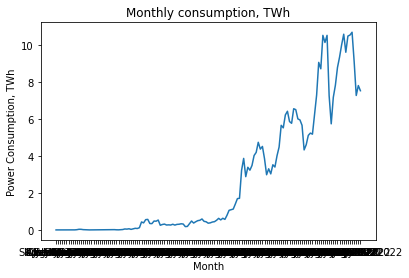

In [14]:
import matplotlib.pyplot as plt
from datetime import date
from datetime import datetime

plt.plot(dk['Month'],dk['Monthly consumption, TWh'])
plt.title('Monthly consumption, TWh')
plt.xlabel('Month')
plt.ylabel('Power Consumption, TWh')
plt.show()

In [15]:
date_ = datetime.today().strftime('%Y-%m-%d').replace('-','')
rcode2 = 'crypto.btc.electricity.consumption.twh.m.ccaf.map.v01.' + date_ 
rlogic2 = 'crypto.btc.electricity.consumption.twh.m.ccaf.map.v01.' + date_

metas_col = ['Tags', 'Values']
metas_tag = ['stats','type','substats','unit','frequency','source','url']
metas_val = ['crypto','btc','electricity.consumption','twh','m','ccaf','https://ccaf.io/cbeci/index']

merged_metas = list(zip(metas_tag,metas_val))

data_metas = pd.DataFrame(data=merged_metas, columns=metas_col)
data_metas.set_index('Tags', drop=True, append=False, inplace=True, verify_integrity=False)
data_metas         

,Values
Tags,
stats,crypto
type,btc
substats,electricity.consumption
unit,twh
frequency,m
source,ccaf
url,https://ccaf.io/cbeci/index


In [16]:
#rose.push()
print('code2:', code2)
print('logic2:', logic2)

rcode2: crypto.btc.electricity.consumption.twh.m.ccaf.map.v01.20220930.geosb
rlogic2: crypto.btc.electricity.consumption.twh.m.ccaf.map.v01.20220930


In [17]:
dk = dk.rename(columns = {'Date and Time':'Volume Date'})
n_cols = []
for i in dk.columns:
  n = i.lower().replace(",","").replace(" ",".")
  n_cols.append(n)

dk.columns = n_cols
dk.head()

,month,monthly.consumption.twh,cumulative.consumption.twh
0,July 2010,0.0000,0.0000
1,August 2010,0.0000,0.0001
2,September 2010,0.0000,0.0001
3,October 2010,0.0001,0.0002
4,November 2010,0.0003,0.0005


In [18]:
splt = pd.DataFrame(dk.month.str.split(' ',1).tolist(),
                         columns = ['first','Last'])
splt['dtt'] = splt['first'].str[:3]
splt.head()

,first,Last,dtt
0,July,2010,Jul
1,August,2010,Aug
2,September,2010,Sep
3,October,2010,Oct
4,November,2010,Nov


In [19]:
dk['period'] = splt[['dtt', 'Last']].agg(' '.join, axis=1)
dk = dk[dk.columns[[3,1,2,0]]]
dk

,period,monthly.consumption.twh,cumulative.consumption.twh,month
0,Jul 2010,0.0000,0.0000,July 2010
1,Aug 2010,0.0000,0.0001,August 2010
2,Sep 2010,0.0000,0.0001,September 2010
3,Oct 2010,0.0001,0.0002,October 2010
4,Nov 2010,0.0003,0.0005,November 2010
...,...,...,...,...
142,May 2022,10.6703,357.2002,May 2022
143,Jun 2022,9.0885,366.2886,June 2022
144,Jul 2022,7.2573,373.5460,July 2022
145,Aug 2022,7.7919,381.3379,August 2022


In [20]:
!pip install python-dateutil
!pip install timestring

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for timestring: filename=timestring-1.6.4-py3-none-any.whl size=13865 sha256=04aa332624fd8282ab4b1dc65b4f5d4a6dcf08771f311305d0c47684c5c37964
  Stored in directory: /root/.cache/pip/wheels/83/5a/36/5e4a5670efe9268642379cb7c65b5aee4584829bb5467d613f
Successfully built timestring


In [21]:
#@title
from dateutil.parser import parse
parse("Today is January 1, 2047 at 8:21:00AM", fuzzy_with_tokens=True)
#(datetime.datetime(2047, 1, 1, 8, 21), (u'Today is ', u' ', u'at '))

(datetime.datetime(2047, 1, 1, 8, 21), ('Today is ', ' ', ' ', 'at '))

In [22]:
import datetime
import json

z = '2022-09-12'
class DateTimeEncoder(json.JSONEncoder):
    def default(self, z):
        if isinstance(z, datetime.datetime):
            return (str(z))
        else:
            return super().default(z)


my_dict = z #{'date': datetime.datetime.now()}

print(json.dumps(my_dict,cls=DateTimeEncoder))


"2022-09-12"


In [23]:
from datetime import datetime, timedelta
#futuredate = datetime.now() + timedelta(days=10)

dates, da = [], []
# dates.append('Jun 2005') #  1:33PM
# dates.append('Aug 1999') # 12:
dates = dk.iloc[:,0]
from datetime import datetime
for d in dates:
  da.append(datetime.strptime(d, '%b %Y') + timedelta(days=10))# %d %I:%M%p
  
dk['months'] = da  
print(type(da))
print(da)

<class 'list'>
[datetime.datetime(2010, 7, 11, 0, 0), datetime.datetime(2010, 8, 11, 0, 0), datetime.datetime(2010, 9, 11, 0, 0), datetime.datetime(2010, 10, 11, 0, 0), datetime.datetime(2010, 11, 11, 0, 0), datetime.datetime(2010, 12, 11, 0, 0), datetime.datetime(2011, 1, 11, 0, 0), datetime.datetime(2011, 2, 11, 0, 0), datetime.datetime(2011, 3, 11, 0, 0), datetime.datetime(2011, 4, 11, 0, 0), datetime.datetime(2011, 5, 11, 0, 0), datetime.datetime(2011, 6, 11, 0, 0), datetime.datetime(2011, 7, 11, 0, 0), datetime.datetime(2011, 8, 11, 0, 0), datetime.datetime(2011, 9, 11, 0, 0), datetime.datetime(2011, 10, 11, 0, 0), datetime.datetime(2011, 11, 11, 0, 0), datetime.datetime(2011, 12, 11, 0, 0), datetime.datetime(2012, 1, 11, 0, 0), datetime.datetime(2012, 2, 11, 0, 0), datetime.datetime(2012, 3, 11, 0, 0), datetime.datetime(2012, 4, 11, 0, 0), datetime.datetime(2012, 5, 11, 0, 0), datetime.datetime(2012, 6, 11, 0, 0), datetime.datetime(2012, 7, 11, 0, 0), datetime.datetime(2012, 8, 1

In [24]:
#@title
import dateutil
from dateutil.parser import parse
from datetime import datetime
import datetime
import json

dt = dk['months']
da = []
for i in dt:
  #print('i:', i)
  #de = datetime.strptime(str(i), '%b %Y') #.date()
  import datetime
  da.append(json.dumps(i, cls=DateTimeEncoder))
  #da = [parser.parse(x) for x in dt]
dk['day'] = da
#dk.ix[:,dk.dtypes==object].apply(lambda s:s.str.replace('"', ""))
dk['days'] = dk.iloc[:,5].apply(lambda s:s.replace('"', ""))
dk.head() #json.dumps(da,cls=DateTimeEncoder)

,period,monthly.consumption.twh,cumulative.consumption.twh,month,months,day,days
0,Jul 2010,0.0000,0.0000,July 2010,2010-07-11,"""2010-07-11 00:00:00""",2010-07-11 00:00:00
1,Aug 2010,0.0000,0.0001,August 2010,2010-08-11,"""2010-08-11 00:00:00""",2010-08-11 00:00:00
2,Sep 2010,0.0000,0.0001,September 2010,2010-09-11,"""2010-09-11 00:00:00""",2010-09-11 00:00:00
3,Oct 2010,0.0001,0.0002,October 2010,2010-10-11,"""2010-10-11 00:00:00""",2010-10-11 00:00:00
4,Nov 2010,0.0003,0.0005,November 2010,2010-11-11,"""2010-11-11 00:00:00""",2010-11-11 00:00:00


In [25]:
df = dk[dk.columns[[6,1,2]]]
df.head()

,days,monthly.consumption.twh,cumulative.consumption.twh
0,2010-07-11 00:00:00,0.0000,0.0000
1,2010-08-11 00:00:00,0.0000,0.0001
2,2010-09-11 00:00:00,0.0000,0.0001
3,2010-10-11 00:00:00,0.0001,0.0002
4,2010-11-11 00:00:00,0.0003,0.0005


In [26]:
df.to_csv('crypto.btc.electric.consump.csv')

crypto.btc.electricity.consumption.twh.m.ccaf.map.v01.20220930.geosb : push map successful
crypto.btc.electricity.consumption.twh.m.ccaf.map.v01.20220930 : push logic successful


In [28]:
push_data = {}
for c in range(2,len(df.columns)):
  name = df.columns[c]
  data = df.iloc[:,[0,c]]
  #define the keys and values. The keys will be the names of the columns
  #push_data[name] = data

#get list of the keys. 
map_keys = ['consumption.twh', 'cum.consumption.twh']#list(push_data.keys())
print(map_keys)

#create the metadata
for k in range(len(map_keys)):
  data = df.iloc[:,[0,k+1]]
  rcode2 = 'crypto.btc.electricity.' + map_keys[k] + '.m.ccaf
  rlogic2 = 'crypto.btc.electricity.' + map_keys[k] + '.m.ccaf' 

  measure = map_keys[k].split(".")[-1].upper()

  metas_col2 = ['Tags', 'Values']
  metas_tag2= ['stats','type','stats','substats','measure','frequency','source','url']
  metas_val2 = ['crypto','btc','electricity', map_keys[k], measure,'d','ccaf','https://ccaf.io/cbeci/api/v1.2.0/download/data?price=0.05']

  merged_metas2 = list(zip(metas_tag2,metas_val2))

  data_metas2 = pd.DataFrame(data=merged_metas, columns=metas_col)
  data_metas2.set_index('Tags', drop=True, append=False, inplace=True, verify_integrity=False)

  #push data to repo
  rdata = data #push_data[map_keys[k]]
  #print('redata:', rdata)
  data.set_index('days', drop=True, append=False, inplace=True, verify_integrity=False)
 

['consumption.twh', 'cum.consumption.twh']
crypto.btc.electricity.consumption.twh.m.ccaf.geosb : push map successful
crypto.btc.electricity.consumption.twh.m.ccaf : push logic successful
crypto.btc.electricity.cum.consumption.twh.m.ccaf.geosb : push map successful
crypto.btc.electricity.cum.consumption.twh.m.ccaf : push logic successful


In [29]:
#map_keys, rdata, 
#push_data #[map_keys[k]], name, 
rdata

#push_data[map_keys[1]]

,cumulative.consumption.twh
days,
2010-07-11 00:00:00,0.0000
2010-08-11 00:00:00,0.0001
2010-09-11 00:00:00,0.0001
2010-10-11 00:00:00,0.0002
2010-11-11 00:00:00,0.0005
...,...
2022-05-11 00:00:00,357.2002
2022-06-11 00:00:00,366.2886
2022-07-11 00:00:00,373.5460


## New Fuction Here

In [30]:
New Function Here

SyntaxError: ignored

In [ ]:
csv_url = 'https://ccaf.io/cbeci/api/v1.2.0/download/mining_countries'
req = r.get(csv_url)
url_content = req.content
csv_file = open('downloaded03.csv', 'wb')
csv_file.write(url_content)
csv_file.close()
time.sleep(5)
dl = pd.read_csv('/content/downloaded03.csv')
dl

In [ ]:
code3 = 'crypto'+'.'+'btc'+'.'+'network.hashrate'+'.'+'eh.s'+'.'+'m'+'.'+'ccaf'+'.'+'geosb'
logic3 = 'crypto'+'.'+'btc'+'.'+'network.hashrate'+'.'+'eh.s'+'.'+'m'+'.'+'ccaf'
metas3 = {'stats':'crypto','type':'btc','substats':'network.hashrate','unit':'exahashrate.per.second','frequency':'m',
         'source':'ccaf','url':'https://ccaf.io/cbeci/mining_map'}

In [ ]:
#push()
print('code3:', code3)
print('logic3:', logic3)

In [ ]:
csv_url = 'https://ccaf.io/cbeci/api/v1.2.0/download/mining_countries'
req = r.get(csv_url)
url_content = req.content
csv_file = open('downloaded04.csv', 'wb')
csv_file.write(url_content)
csv_file.close()
time.sleep(5)
dm = pd.read_csv('/content/downloaded04.csv')
dm

In [ ]:
code4 = 'wld'+'.'+'crypto'+'.'+'btc'+'.'+'share.of.global.hashrate'+'.'+'eh.s'+'.'+'m'+'.'+'ccaf'+'.'+'geosb'
logic4 = 'wld'+'.'+'crypto'+'.'+'btc'+'.'+'share.of.global.hashrate'+'.'+'eh.s'+'.'+'m'+'.'+'ccaf'
metas4 = {'city':'world','stats':'crypto','type':'btc','substats':'share.of.global.hashrate','unit':'exahashrate.per.second','frequency':'m',
         'source':'ccaf','url':'https://ccaf.io/cbeci/mining_map'}

In [ ]:
#push()
print('code4:', code4)
print('logic4:', logic4)

In [ ]:
csv_url = 'https://ccaf.io/cbeci/api/v1.2.0/download/mining_provinces'
req = r.get(csv_url)
url_content = req.content
csv_file = open('downloaded05.csv', 'wb')
csv_file.write(url_content)
csv_file.close()
time.sleep(5)
dn = pd.read_csv('/content/downloaded05.csv')
dn

In [ ]:
code5 = 'chn'+'.'+'crypto'+'.'+'btc'+'.'+'share.of.china.hashrate'+'.'+'eh.s'+'.'+'m'+'.'+'ccaf'+'.'+'geosb'
logic5 = 'chn'+'.'+'crypto'+'.'+'btc'+'.'+'hashrate.share.of.china.states'+'.'+'eh.s'+'.'+'m'+'.'+'ccaf'
metas5 = {'city':'world','stats':'crypto','type':'btc','substats':'share.of.global.hashrate','unit':'exahashrate.per.second','frequency':'m',
         'source':'ccaf','url':'https://ccaf.io/cbeci/mining_map'}

In [ ]:
csv_url = 'https://ccaf.io/cbeci/api/v1.2.0/download/mining_provinces/us'
req = r.get(csv_url)
url_content = req.content
csv_file = open('downloaded06.csv', 'wb')
csv_file.write(url_content)
csv_file.close()
time.sleep(5)
do = pd.read_csv('/content/downloaded06.csv')
do

In [ ]:
import numpy as np

plt.pie(do['US hashrate by state'], labels = do['State'])
plt.title('US states BTC hashrate Dec 2021')
#plt.legend(title = "US states hashrate:") #Hashrate share of United States by states, December 2021
plt.show() 

In [ ]:
import requests as r
import time

csv_url = 'https://data.mendeley.com/public-files/datasets/4dw6j3pxz5/files/95509fdc-f7dd-4d53-a3ab-242dbaf119bb/file_downloaded'
req = r.get(csv_url)
url_content = req.content
csv_file = open('downloaded08.csv', 'wb') #as f #wb
csv_file.write(url_content) #write
csv_file.close()
time.sleep(5)


Ehereum emmsion

In [ ]:
import requests
import pandas as pd

url = 'https://kylemcdonald.github.io/ethereum-emissions/output/daily-gw.csv'
jsonData = requests.get(url).json()

df = pd.DataFrame(jsonData)
df.to_csv('file.csv', index=False) 
df

In [ ]:
from flask import send_file


url = ("https://kylemcdonald.github.io/ethereum-emissions/output/daily-gw.csv")
def plot_csv(url):
    return send_file(
        "outputs/Adjacency.csv",
        mimetype="text/csv",
        attachment_filename="Adjacency.csv",
        as_attachment=True,
    )

In [ ]:
import requests
import pandas as pd

url = 'https://www.rotowire.com/basketball/tables/injury-report.php?team=ALL&pos=ALL'
jsonData = requests.get(url).json()

df = pd.DataFrame(jsonData)
df.to_csv('file.csv', index=False) 

In [ ]:
df

### New Codes


In [31]:
source = 'https://github.com/Camilo-Mora/Bitcoin/blob/master/BitCoinData_2017.csv'
csv_url = 'https://github.com/Camilo-Mora/Bitcoin/raw/master/BitCoinData_2017.csv'
req = r.get(csv_url)
url_content = req.content
csv_file = open('BitCoinData_2017.csv', 'wb')
csv_file.write(url_content)
csv_file.close()

In [33]:
dp = pd.read_csv('BitCoinData_2017.csv')
dp.tail()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,X,hash,version,height,block_time,arrival_time,nonce,difficulty,merkleroot,is_orphan,byte_size,confirmations,transactions,value,Mining_pool,miningpool_url,miningpool_slug
55859,55860,000000000000000000280aa39b359d03a6c756acb32977...,536870912,501956,2017-12-31T23:26:06+0000,2017-12-31T23:27:09+0000,2866748514,1.870000e+12,dce2b72234ccff4596cf327b824ab5a8cd4a66c1ecc881...,False,993670.0,17108,1357,2.800000e+11,AntPool,https://antpool.com,antpool
55860,55861,000000000000000000637684e91d20f86e886f6a7788b0...,536870912,501957,2017-12-31T23:33:35+0000,2017-12-31T23:33:48+0000,4043812903,1.870000e+12,20c12e02a938b60216799c6ba57fe755466dc501ce76c9...,False,988224.0,17107,1738,2.840000e+11,BTCC,https://pool.btcc.com/,btcc
55861,55862,00000000000000000047a50da564b9fe5f36e5b57186c2...,536870912,501958,2017-12-31T23:40:56+0000,2017-12-31T23:41:16+0000,1752503717,1.870000e+12,82e98738afa39b08d7b6a61c87f87b1c5ee8ffe45550f2...,False,989087.0,17106,1996,3.350000e+11,BTC.com,https://pool.btc.com,btccom
55862,55863,00000000000000000089ea059ced493ed324ee379cca61...,536870912,501959,2017-12-31T23:43:42+0000,2017-12-31T23:43:53+0000,2521416964,1.870000e+12,919e7731201e8d2e73bdcf89f083ea3ff394c3755eef1c...,False,993790.0,17105,1802,1.230000e+11,Slush,https://mining.bitcoin.cz,slush
55863,55864,00000000000000000075ca6b039ebf264978f4b9e7105e...,536870912,501960,2017-12-31T23:48:38+0000,2017-12-31T23:48:59+0000,4031203556,1.870000e+12,7213ff9161cb29c340fed23cd74abab4892cb635734ffd...,False,993269.0,17104,1717,5.790000e+11,BTC.com,https://pool.btc.com,btccom
